In [1]:
# importing library
import matplotlib.pyplot as plt
import numpy as np
import os
from DatasetManager import DatasetManager
import pandas as pd

In [2]:
def make_axes(ax,x, y1,y2,y3,y4,y5,y6,y7,y8,y9):
    ax.set_xticks([1,9,max_prefix_length])
    ax.plot(x, y1, label = 'LR', marker='x', linewidth=1)
    ax.plot(x, y2, label = 'RF',  marker='x', linewidth=1)
    ax.plot(x, y3, label = 'LSTM', marker='x', linewidth=1)
    ax.plot(x, y4, label = 'LR (A1)', marker='v', linewidth=1)
    ax.plot(x, y5, label = 'RF (A1)', marker='v', linewidth=1)
    ax.plot(x, y6, label = 'LSTM (A1)', marker='v', linewidth=1)
    ax.plot(x, y7, label = 'LR (A2)', marker='o', linewidth=1)
    ax.plot(x, y8, label = 'RF (A2)', marker='o', linewidth=1)
    ax.plot(x, y9, label = 'LSTM (A2)', marker='v', linewidth=1)
    return ax

# Train Attack

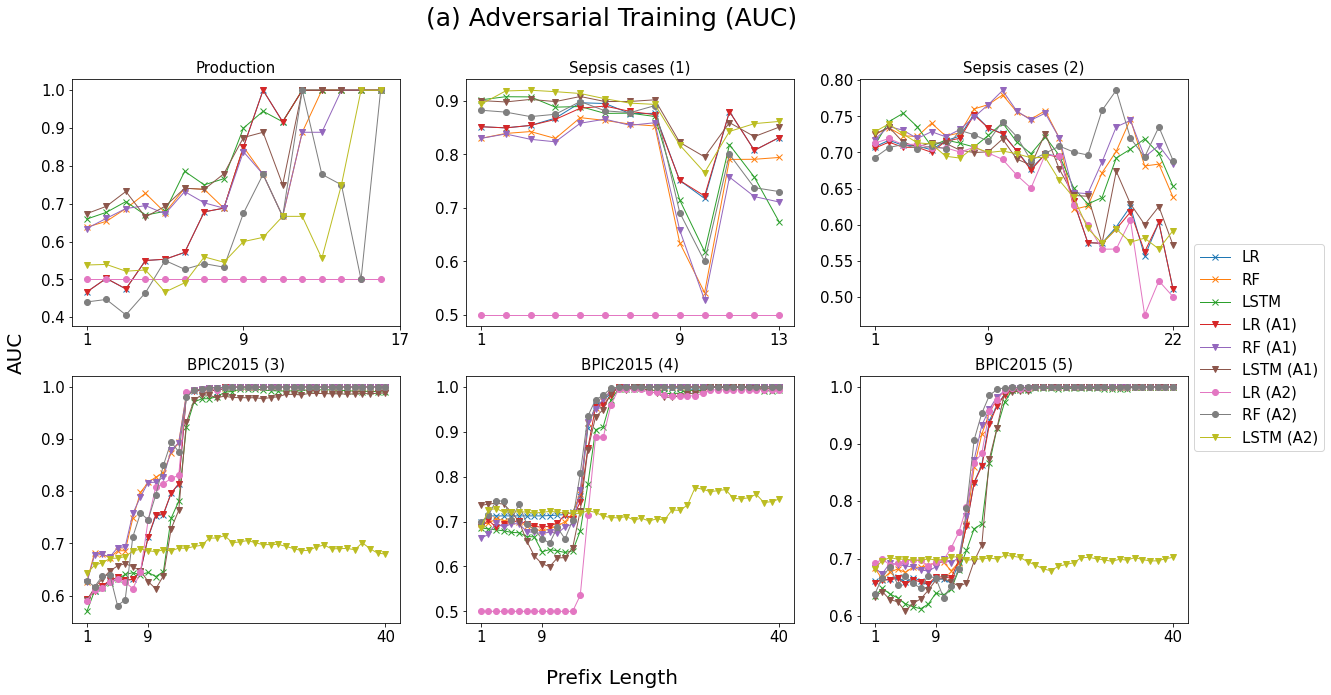

In [3]:
#PRODUCTION
directory = './results_dir_ML'
cls_method = 'LR'
dataset_name = 'production'
method_name ='all_agg'
# classifiers dictionary
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
total_auc = pd.DataFrame()
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_PROD_AUC = data['metric'].iloc[max_prefix_length]
LR_PROD_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_PROD_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_PROD_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_PROD_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_PROD_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
directory = './results_dir_DL'
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_PROD_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_PROD_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_PROD_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x1 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
ax1 = make_axes(ax1,x1, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax1.set_xticks([1,9,max_prefix_length])
ax1.set_title("Production", fontsize=15)

#SEPSIS 2
dataset_name = 'sepsis_cases_2'
directory = './results_dir_ML'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]

total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_SEPSIS2_AUC = data['metric'].iloc[max_prefix_length]
LR_SEPSIS2_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_SEPSIS2_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_SEPSIS2_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_SEPSIS2_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_SEPSIS2_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
directory = './results_dir_DL'
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_SEPSIS2_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_SEPSIS2_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_SEPSIS2_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x2 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax2 = make_axes(ax2,x2, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax2.set_xticks([1,9,max_prefix_length])
ax2.set_title("Sepsis cases (1)", fontsize=15)

#SEPSIS 4
dataset_name = 'sepsis_cases_4'
directory = './results_dir_ML'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_SEPSIS4_AUC = data['metric'].iloc[max_prefix_length]
LR_SEPSIS4_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_SEPSIS4_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_SEPSIS4_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_SEPSIS4_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_SEPSIS4_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
directory = './results_dir_DL'
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_SEPSIS4_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_SEPSIS4_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_SEPSIS4_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x3 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax3 = make_axes(ax3,x3, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax3.set_xticks([1,9,max_prefix_length])
ax3.set_title("Sepsis cases (2)", fontsize=15)

#BPIC2015 3
dataset_name = 'bpic2015_3_f2'
directory = './results_dir_ML'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_BPIC153_AUC = data['metric'].iloc[max_prefix_length]
LR_BPIC153_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_BPIC153_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_BPIC153_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_BPIC153_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_BPIC153_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
directory = './results_dir_DL'
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_BPIC153_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_BPIC153_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_BPIC153_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x4 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax4 = make_axes(ax4,x4, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax4.set_xticks([1,9,max_prefix_length])
ax4.set_title("BPIC2015 (3)", fontsize=15)

#BPIC2015 4
dataset_name = 'bpic2015_4_f2'
directory = './results_dir_ML'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_BPIC154_AUC = data['metric'].iloc[max_prefix_length]
LR_BPIC154_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_BPIC154_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_BPIC154_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_BPIC154_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_BPIC154_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
directory = './results_dir_DL'
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_BPIC154_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_BPIC154_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_BPIC154_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x5 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax5 = make_axes(ax5,x5, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax5.set_xticks([1,9,max_prefix_length])
ax5.set_title("BPIC2015 (4)", fontsize=15)
#BPIC2015 5
dataset_name = 'bpic2015_5_f2'
directory = './results_dir_ML'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_BPIC155_AUC = data['metric'].iloc[max_prefix_length]
LR_BPIC155_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_BPIC155_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, "performance_results_%s_%s_%s.csv" % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_BPIC155_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_BPIC155_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_BPIC155_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
directory = './results_dir_DL'
infile = os.path.join(directory, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_BPIC155_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_BPIC155_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_BPIC155_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x6 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax6 = make_axes(ax6,x6, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax6.set_title("BPIC2015 (5)", fontsize=15)

ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)
ax3.tick_params(axis='both', labelsize=15)
ax4.tick_params(axis='both', labelsize=15)
ax5.tick_params(axis='both', labelsize=15)
ax6.tick_params(axis='both', labelsize=15)

fig.suptitle('(a) Adversarial Training (AUC)', fontsize=25)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', fontsize=15)
fig.text(0.5, 0.04, 'Prefix Length', ha='center', fontsize=20)
fig.text(0.08, 0.5, 'AUC', va='center', rotation='vertical', fontsize=20)
plt.savefig('performanceAUCtrain.pdf', transparent=True)
plt.show()

# AUC train

In [4]:
df = pd.DataFrame(index=range(9),columns=range(6))

In [5]:
eventlogs = ['BPIC2015(3)','BPIC2015(4)','BPIC2015(5)','SEPSIS (2)','SEPSIS(4)','PRODUCTION']
index = ['LR','LR ATTACK1','LR_ATTACK2','RF','RF ATTACK1','RF_ATTACK2','LSTM','LSTM ATTACK1','LSTM_ATTACK2']

In [6]:
df.columns = eventlogs
df.index  = index

In [7]:
LR_AUC = [LR_BPIC153_AUC,LR_BPIC154_AUC,LR_BPIC155_AUC,LR_SEPSIS2_AUC,LR_SEPSIS4_AUC,LR_PROD_AUC]
LR_AUC1 = [LR_BPIC153_AUC1,LR_BPIC154_AUC1,LR_BPIC155_AUC1,LR_SEPSIS2_AUC1,LR_SEPSIS4_AUC1,LR_PROD_AUC1]
LR_AUC2 = [LR_BPIC153_AUC2,LR_BPIC154_AUC2,LR_BPIC155_AUC2,LR_SEPSIS2_AUC2,LR_SEPSIS4_AUC2,LR_PROD_AUC2]
RF_AUC = [RF_BPIC153_AUC,RF_BPIC154_AUC,RF_BPIC155_AUC,RF_SEPSIS2_AUC,RF_SEPSIS4_AUC,RF_PROD_AUC]
RF_AUC1 = [RF_BPIC153_AUC1,RF_BPIC154_AUC1,RF_BPIC155_AUC1,RF_SEPSIS2_AUC1,RF_SEPSIS4_AUC1,RF_PROD_AUC1]
RF_AUC2 = [RF_BPIC153_AUC2,RF_BPIC154_AUC2,RF_BPIC155_AUC2,RF_SEPSIS2_AUC2,RF_SEPSIS4_AUC2,RF_PROD_AUC2]
LSTM_AUC = [LSTM_BPIC153_AUC,LSTM_BPIC154_AUC,LSTM_BPIC155_AUC,LSTM_SEPSIS2_AUC,LSTM_SEPSIS4_AUC,LSTM_PROD_AUC]
LSTM_AUC1 = [LSTM_BPIC153_AUC1,LSTM_BPIC154_AUC1,LSTM_BPIC155_AUC1,LSTM_SEPSIS2_AUC1,LSTM_SEPSIS4_AUC1,LSTM_PROD_AUC1]
LSTM_AUC2 = [LSTM_BPIC153_AUC2,LSTM_BPIC154_AUC2,LSTM_BPIC155_AUC2,LSTM_SEPSIS2_AUC2,LSTM_SEPSIS4_AUC2,LSTM_PROD_AUC2]

In [8]:
LR_AUC = [round(float(num), 2) for num in LR_AUC]
LR_AUC1 = [round(float(num), 2) for num in LR_AUC1]
LR_AUC2 = [round(float(num), 2) for num in LR_AUC2]
RF_AUC = [round(float(num), 2) for num in RF_AUC]
RF_AUC1 = [round(float(num),2) for num in RF_AUC1]
RF_AUC2 = [round(float(num), 2) for num in RF_AUC2]
LSTM_AUC = [round(float(num), 2) for num in LSTM_AUC]
LSTM_AUC1 = [round(float(num), 2) for num in LSTM_AUC1]
LSTM_AUC2 = [round(float(num), 2) for num in LSTM_AUC2]

In [9]:
df.iloc[0] = LR_AUC
df.iloc[1] = LR_AUC1
df.iloc[2] = LR_AUC2
df.iloc[3] = RF_AUC
df.iloc[4] = RF_AUC1
df.iloc[5] = RF_AUC2
df.iloc[6] = LSTM_AUC
df.iloc[7] = LSTM_AUC1
df.iloc[8] = LSTM_AUC2

In [10]:
df

,BPIC2015(3),BPIC2015(4),BPIC2015(5),SEPSIS (2),SEPSIS(4),PRODUCTION
LR,0.96,0.94,0.94,0.87,0.69,0.63
LR ATTACK1,0.96,0.94,0.94,0.87,0.69,0.63
LR_ATTACK2,0.96,0.79,0.95,0.5,0.69,0.5
RF,0.96,0.94,0.95,0.84,0.75,0.71
RF ATTACK1,0.96,0.94,0.95,0.83,0.75,0.7
RF_ATTACK2,0.96,0.94,0.95,0.86,0.73,0.53
LSTM,0.94,0.9,0.93,0.86,0.72,0.75
LSTM ATTACK1,0.93,0.91,0.93,0.88,0.7,0.76
LSTM_ATTACK2,0.67,0.71,0.68,0.88,0.7,0.56


# Explanation distance

In [11]:
def transform_distance(outfile, max_prefix_length):
    df = pd.read_csv(outfile, header=None, nrows=max_prefix_length)
    df.columns = ['distance 1', 'distance 2', 'prefix lengths','correct flips', 'wrong flips']
    df['same predictions'] = df['prefix lengths']-df['correct flips']-df['wrong flips']
    df['distance 1'] = df['distance 1']/df['same predictions']
    return df

In [12]:
def create_plot(ax, title, max_prefix_length):
    ax.set_title(title, fontsize=15)
    x = [i for i in range(0,max_prefix_length)]
    LR['distance 1 scaled'] = np.log(LR['distance 1'])
    RF['distance 1 scaled'] = np.log(RF['distance 1'])
    LSTM['distance 1 scaled'] = np.log(LSTM['distance 1'])
    y1 = LR['distance 1 scaled']
    y3 = RF['distance 1']
    y5 = LSTM['distance 1']
    ax.plot(x, y1, label = 'LR', marker='x', linewidth=1)
    ax.plot(x, y3, label = 'RF', marker='x', linewidth=1)
    ax.plot(x, y5, label = 'LSTM', marker='x', linewidth=1)
    ax.set_xticks([1,9,max_prefix_length],fontsize=200)
    ax.tick_params(axis='both', labelsize=15)
    return ax

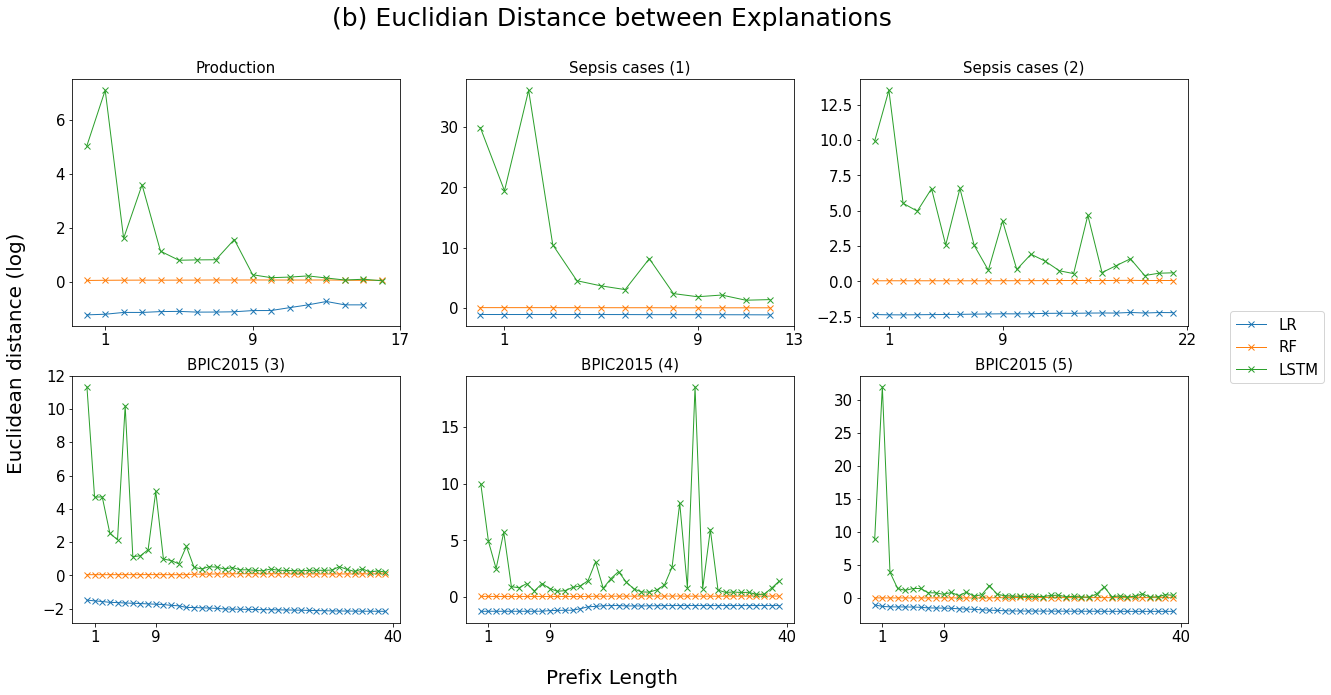

In [13]:
# Data for plotting
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
#### PRODUCTION ####
dataset_name = 'production'
directory = './results_dir_ML'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
outfile_LR1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('LR', dataset_name, method_name))    
LR = transform_distance(outfile_LR1, max_prefix_length)
#Random forest
outfile_RF1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('RF', dataset_name, method_name))    
RF = transform_distance(outfile_RF1, max_prefix_length)
#LSTM
directory = './results_dir_DL'
method_name ='all_OHE'
outfile_LSTM1 = os.path.join(directory, "attack1_%s_%s_%s.csv" % ('LSTM', dataset_name, method_name))    
LSTM = transform_distance(outfile_LSTM1, max_prefix_length)
ax1 = create_plot(ax1, 'Production', max_prefix_length)

#### SEPSIS CASES 2 ####
dataset_name = 'sepsis_cases_2'
directory = './results_dir_ML'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
outfile_LR1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('LR', dataset_name, method_name))    
LR = transform_distance(outfile_LR1, max_prefix_length)

#Random forest
outfile_RF1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('RF', dataset_name, method_name))    
RF = transform_distance(outfile_RF1, max_prefix_length)

#LSTM
directory = './results_dir_DL'
method_name ='all_OHE'
outfile_LSTM1 = os.path.join(directory, "attack1_%s_%s_%s.csv" % ('LSTM', dataset_name, method_name))    
LSTM = transform_distance(outfile_LSTM1, max_prefix_length)

ax2 = create_plot(ax2, 'Sepsis cases (1)', max_prefix_length)

#### SEPSIS CASES 4 ####
dataset_name = 'sepsis_cases_4'
directory = './results_dir_ML'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
outfile_LR1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('LR', dataset_name, method_name))    
LR = transform_distance(outfile_LR1, max_prefix_length)

#Random forest
outfile_RF1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('RF', dataset_name, method_name))    
RF = transform_distance(outfile_RF1, max_prefix_length)

#LSTM
directory = './results_dir_DL'
method_name ='all_OHE'
outfile_LSTM1 = os.path.join(directory, "attack1_%s_%s_%s.csv" % ('LSTM', dataset_name, method_name))    
LSTM = transform_distance(outfile_LSTM1, max_prefix_length)

ax3 = create_plot(ax3, 'Sepsis cases (2)', max_prefix_length)

#### BPIC15 3  ####
dataset_name = 'bpic2015_3_f2'
directory = './results_dir_ML'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
outfile_LR1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('LR', dataset_name, method_name))    
LR = transform_distance(outfile_LR1, max_prefix_length)

#Random forest
outfile_RF1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('RF', dataset_name, method_name))    
RF = transform_distance(outfile_RF1, max_prefix_length)

#LSTM
directory = './results_dir_DL'
method_name ='all_OHE'
outfile_LSTM1 = os.path.join(directory, "attack1_%s_%s_%s.csv" % ('LSTM', dataset_name, method_name))    
LSTM = transform_distance(outfile_LSTM1, max_prefix_length)

ax4 = create_plot(ax4, 'BPIC2015 (3)', max_prefix_length)

#### BPIC2015 4 ####
dataset_name = 'bpic2015_4_f2'
directory = './results_dir_ML'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
outfile_LR1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('LR', dataset_name, method_name))    
LR = transform_distance(outfile_LR1, max_prefix_length)

#Random forest
outfile_RF1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('RF', dataset_name, method_name))    
RF = transform_distance(outfile_RF1, max_prefix_length)

#LSTM
directory = './results_dir_DL'
method_name ='all_OHE'
outfile_LSTM1 = os.path.join(directory, "attack1_%s_%s_%s.csv" % ('LSTM', dataset_name, method_name))    
LSTM = transform_distance(outfile_LSTM1, max_prefix_length)
correct_flips_LR = list(LR['correct flips'])
wrong_flips_LR = list(-1*LR['wrong flips'])
correct_flips_RF = list(RF['correct flips'])
wrong_flips_RF = list(-1*RF['wrong flips'])
correct_flips_LSTM = list(LSTM['correct flips'])
wrong_flips_LSTM = list(-1*LSTM['wrong flips'])
ax5 = create_plot(ax5,'BPIC2015 (4)', max_prefix_length)
#### BPIC2015 5 ####
dataset_name = 'bpic2015_5_f2'
directory = './results_dir_ML'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
outfile_LR1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('LR', dataset_name, method_name))    
LR = transform_distance(outfile_LR1, max_prefix_length)

#Random forest
outfile_RF1 = os.path.join(directory, "attack1%s_%s_%s.csv" % ('RF', dataset_name, method_name))    
RF = transform_distance(outfile_RF1, max_prefix_length)

#LSTM
directory = './results_dir_DL'
method_name ='all_OHE'
outfile_LSTM1 = os.path.join(directory, "attack1_%s_%s_%s.csv" % ('LSTM', dataset_name, method_name))    
LSTM = transform_distance(outfile_LSTM1, max_prefix_length)

ax6 = create_plot(ax6,'BPIC2015 (5)', max_prefix_length)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', fontsize=15)
fig.text(0.5, 0.04, 'Prefix Length', ha='center', fontsize=20)
fig.text(0.08, 0.5, 'Euclidean distance (log)', va='center', rotation='vertical', fontsize=20)
fig.suptitle('(b) Euclidian Distance between Explanations', fontsize=25)
plt.savefig('DistanceMetric.pdf', transparent=True)
plt.rc('xtick',labelsize=8)
plt.show()

# AUC test

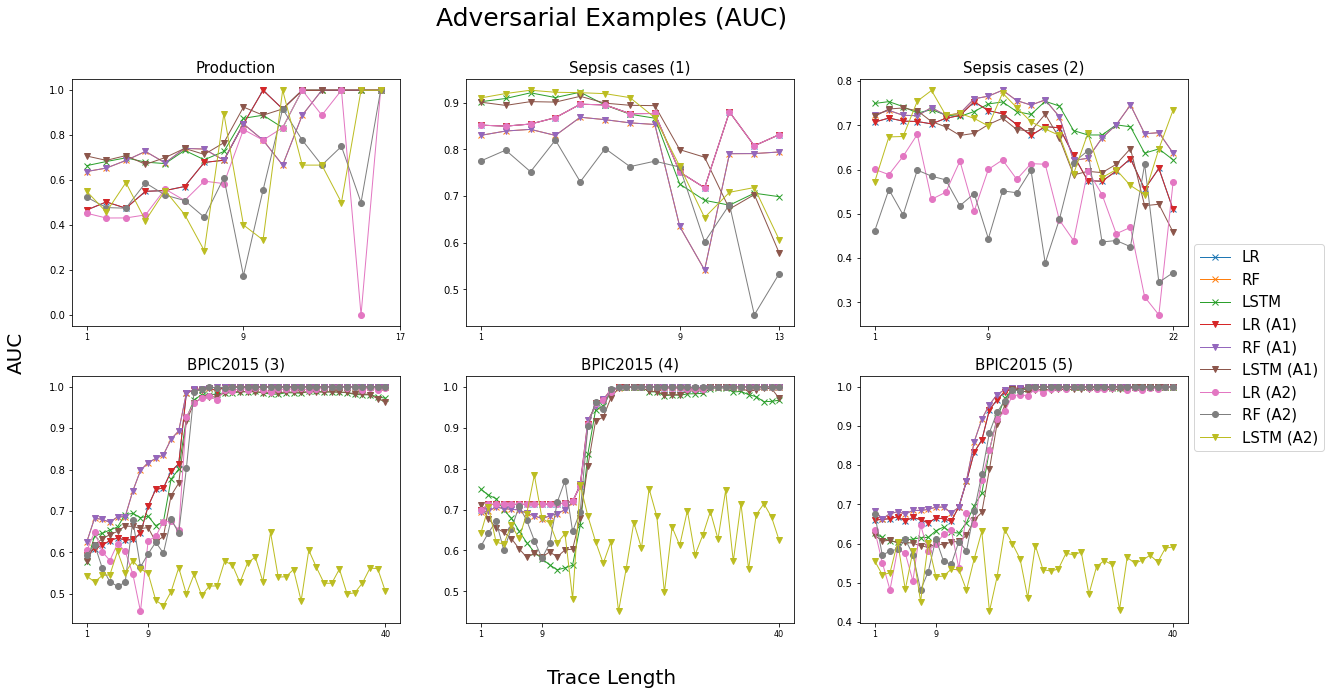

In [14]:
#PRODUCTION
directory = './results_dir_ML_test'
directory_DL_test = './results_dir_DL_test'
performance_results_ML = "performance_results_test%s_%s_%s.csv"
performance_results_DL = "performance_results_%s_%s_%s.csv"
cls_method = 'LR'
dataset_name = 'production'
method_name ='all_agg'
# classifiers dictionary
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, performance_results_ML % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
total_auc = pd.DataFrame()
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_PROD_AUC = data['metric'].iloc[max_prefix_length]
LR_PROD_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_PROD_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, performance_results_ML % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_PROD_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_PROD_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_PROD_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
infile = os.path.join(directory_DL_test, performance_results_DL % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_PROD_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_PROD_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_PROD_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x1 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
ax1 = make_axes(ax1,x1, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax1.set_xticks([1,9,max_prefix_length])
ax1.set_title("Production", fontsize=15)

#SEPSIS 2
dataset_name = 'sepsis_cases_2'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, performance_results_ML % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]

total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_SEPSIS2_AUC = data['metric'].iloc[max_prefix_length]
LR_SEPSIS2_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_SEPSIS2_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, performance_results_ML % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_SEPSIS2_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_SEPSIS2_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_SEPSIS2_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
infile = os.path.join(directory_DL_test, performance_results_DL % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_SEPSIS2_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_SEPSIS2_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_SEPSIS2_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x2 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax2 = make_axes(ax2,x2, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax2.set_xticks([1,9,max_prefix_length])
ax2.set_title("Sepsis cases (1)", fontsize=15)

#SEPSIS 4
dataset_name = 'sepsis_cases_4'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, performance_results_ML % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_SEPSIS4_AUC = data['metric'].iloc[max_prefix_length]
LR_SEPSIS4_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_SEPSIS4_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, performance_results_ML % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_SEPSIS4_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_SEPSIS4_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_SEPSIS4_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
infile = os.path.join(directory_DL_test, performance_results_DL % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_SEPSIS4_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_SEPSIS4_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_SEPSIS4_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x3 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax3 = make_axes(ax3,x3, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax3.set_xticks([1,9,max_prefix_length])
ax3.set_title("Sepsis cases (2)", fontsize=15)
#ax3.legend(loc='lower left', ncol=1)

#BPIC2015 3
dataset_name = 'bpic2015_3_f2'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, performance_results_ML % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_BPIC153_AUC = data['metric'].iloc[max_prefix_length]
LR_BPIC153_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_BPIC153_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, performance_results_ML % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_BPIC153_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_BPIC153_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_BPIC153_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
infile = os.path.join(directory_DL_test, performance_results_DL % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_BPIC153_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_BPIC153_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_BPIC153_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x4 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax4 = make_axes(ax4,x4, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax4.set_xticks([1,9,max_prefix_length])
ax4.set_title("BPIC2015 (3)", fontsize=15)

#BPIC2015 4
dataset_name = 'bpic2015_4_f2'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, performance_results_ML % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_BPIC154_AUC = data['metric'].iloc[max_prefix_length]
LR_BPIC154_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_BPIC154_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, performance_results_ML % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_BPIC154_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_BPIC154_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_BPIC154_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
infile = os.path.join(directory_DL_test, performance_results_DL % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_BPIC154_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_BPIC154_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_BPIC154_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x5 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax5 = make_axes(ax5,x5, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax5.set_xticks([1,9,max_prefix_length])
ax5.set_title("BPIC2015 (4)", fontsize=15)

#BPIC2015 5
dataset_name = 'bpic2015_5_f2'
cls_method = 'LR'
method_name ='all_agg'
dataset_manager = DatasetManager(dataset_name)
data = dataset_manager.read_dataset()
if "traffic_fines" in dataset_name:
    max_prefix_length = 10
elif "bpic2017" in dataset_name:
    max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
elif "production" in dataset_name:
    max_prefix_length = 17
else:
    max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))
infile = os.path.join(directory, performance_results_ML % ('LR', dataset_name, method_name))
data = pd.read_csv(infile, delimiter=';')
score_before_LR = data['score'].iloc[:max_prefix_length]
score_attack1_LR = data['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LR = data['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LR before'] = data['metric'].iloc[max_prefix_length]
total_auc['LR attack1'] = data['metric'].iloc[2*max_prefix_length+1]
total_auc['LR attack2'] = data['metric'].iloc[3*max_prefix_length+2]
LR_BPIC155_AUC = data['metric'].iloc[max_prefix_length]
LR_BPIC155_AUC1 = data['metric'].iloc[2*max_prefix_length+1]
LR_BPIC155_AUC2 = data['metric'].iloc[3*max_prefix_length+2]
#RANDOM FOREST
infile_RF = os.path.join(directory, performance_results_ML % ('RF', dataset_name, method_name))
data_RF = pd.read_csv(infile_RF, delimiter=';')
score_before_RF = data_RF['score'].iloc[:max_prefix_length]
score_attack1_RF = data_RF['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_RF = data_RF['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['RF before'] = data_RF['metric'].iloc[max_prefix_length]
total_auc['RF attack1'] = data_RF['metric'].iloc[2*max_prefix_length+1]
total_auc['RF attack2'] = data_RF['metric'].iloc[3*max_prefix_length+2]
RF_BPIC155_AUC = data_RF['metric'].iloc[max_prefix_length]
RF_BPIC155_AUC1 = data_RF['metric'].iloc[2*max_prefix_length+1]
RF_BPIC155_AUC2 = data_RF['metric'].iloc[3*max_prefix_length+2]
#LSTM
cls_method = 'LSTM'
method_name ='all_OHE'
infile = os.path.join(directory_DL_test, performance_results_DL % (cls_method, dataset_name, method_name))
data_LSTM = pd.read_csv(infile, delimiter=';')
score_before_LSTM = data_LSTM['score'].iloc[:max_prefix_length]
score_attack1_LSTM = data_LSTM['score'].iloc[max_prefix_length+1:(2*max_prefix_length+1)]
score_attack2_LSTM = data_LSTM['score'].iloc[(2*max_prefix_length+2):(3*max_prefix_length+2)]
total_auc['LSTM before'] = data_LSTM['metric'].iloc[max_prefix_length]
total_auc['LSTM attack1'] = data_LSTM['metric'].iloc[2*max_prefix_length+1]
total_auc['LSTM attack2'] = data_LSTM['metric'].iloc[3*max_prefix_length+2]
LSTM_BPIC155_AUC = data_LSTM['metric'].iloc[max_prefix_length]
LSTM_BPIC155_AUC1 = data_LSTM['metric'].iloc[2*max_prefix_length+1]
LSTM_BPIC155_AUC2 = data_LSTM['metric'].iloc[3*max_prefix_length+2]
# Data for plotting
x6 = [i for i in range(1,max_prefix_length+1)]
y1 = score_before_LR
y2 = score_before_RF
y3 = score_before_LSTM
y4 = score_attack1_LR
y5 = score_attack1_RF
y6 = score_attack1_LSTM
y7 = score_attack2_LR
y8 = score_attack2_RF
y9 = score_attack2_LSTM
ax6 = make_axes(ax6,x6, y1,y2,y3,y4,y5,y6,y7,y8,y9)
ax6.set_title("BPIC2015 (5)", fontsize=15)
fig.suptitle('Adversarial Examples (AUC)', fontsize=25)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', fontsize=15)
fig.text(0.5, 0.04, 'Trace Length', ha='center', fontsize=20)
fig.text(0.08, 0.5, 'AUC', va='center', rotation='vertical', fontsize=20)
plt.savefig('performanceAUCtest.pdf')
plt.show()

In [15]:
df = pd.DataFrame(index=range(9),columns=range(6))

eventlogs = ['BPIC2015(3)','BPIC2015(4)','BPIC2015(5)','SEPSIS (2)','SEPSIS(4)','PRODUCTION']
index = ['LR','LR ATTACK1','LR_ATTACK2','RF','RF ATTACK1','RF_ATTACK2','LSTM','LSTM ATTACK1','LSTM_ATTACK2']

df.columns = eventlogs
df.index  = index

LR_AUC = [LR_BPIC153_AUC,LR_BPIC154_AUC,LR_BPIC155_AUC,LR_SEPSIS2_AUC,LR_SEPSIS4_AUC,LR_PROD_AUC]
LR_AUC1 = [LR_BPIC153_AUC1,LR_BPIC154_AUC1,LR_BPIC155_AUC1,LR_SEPSIS2_AUC1,LR_SEPSIS4_AUC1,LR_PROD_AUC1]
LR_AUC2 = [LR_BPIC153_AUC2,LR_BPIC154_AUC2,LR_BPIC155_AUC2,LR_SEPSIS2_AUC2,LR_SEPSIS4_AUC2,LR_PROD_AUC2]
RF_AUC = [RF_BPIC153_AUC,RF_BPIC154_AUC,RF_BPIC155_AUC,RF_SEPSIS2_AUC,RF_SEPSIS4_AUC,RF_PROD_AUC]
RF_AUC1 = [RF_BPIC153_AUC1,RF_BPIC154_AUC1,RF_BPIC155_AUC1,RF_SEPSIS2_AUC1,RF_SEPSIS4_AUC1,RF_PROD_AUC1]
RF_AUC2 = [RF_BPIC153_AUC2,RF_BPIC154_AUC2,RF_BPIC155_AUC2,RF_SEPSIS2_AUC2,RF_SEPSIS4_AUC2,RF_PROD_AUC2]
LSTM_AUC = [LSTM_BPIC153_AUC,LSTM_BPIC154_AUC,LSTM_BPIC155_AUC,LSTM_SEPSIS2_AUC,LSTM_SEPSIS4_AUC,LSTM_PROD_AUC]
LSTM_AUC1 = [LSTM_BPIC153_AUC1,LSTM_BPIC154_AUC1,LSTM_BPIC155_AUC1,LSTM_SEPSIS2_AUC1,LSTM_SEPSIS4_AUC1,LSTM_PROD_AUC1]
LSTM_AUC2 = [LSTM_BPIC153_AUC2,LSTM_BPIC154_AUC2,LSTM_BPIC155_AUC2,LSTM_SEPSIS2_AUC2,LSTM_SEPSIS4_AUC2,LSTM_PROD_AUC2]

LR_AUC = [round(float(num), 2) for num in LR_AUC]
LR_AUC1 = [round(float(num), 2) for num in LR_AUC1]
LR_AUC2 = [round(float(num), 2) for num in LR_AUC2]
RF_AUC = [round(float(num), 2) for num in RF_AUC]
RF_AUC1 = [round(float(num),2) for num in RF_AUC1]
RF_AUC2 = [round(float(num), 2) for num in RF_AUC2]
LSTM_AUC = [round(float(num), 2) for num in LSTM_AUC]
LSTM_AUC1 = [round(float(num), 2) for num in LSTM_AUC1]
LSTM_AUC2 = [round(float(num), 2) for num in LSTM_AUC2]

df.iloc[0] = LR_AUC
df.iloc[1] = LR_AUC1
df.iloc[2] = LR_AUC2
df.iloc[3] = RF_AUC
df.iloc[4] = RF_AUC1
df.iloc[5] = RF_AUC2
df.iloc[6] = LSTM_AUC
df.iloc[7] = LSTM_AUC1
df.iloc[8] = LSTM_AUC2

df

,BPIC2015(3),BPIC2015(4),BPIC2015(5),SEPSIS (2),SEPSIS(4),PRODUCTION
LR,0.96,0.94,0.94,0.87,0.69,0.63
LR ATTACK1,0.96,0.94,0.94,0.87,0.69,0.63
LR_ATTACK2,0.89,0.94,0.89,0.87,0.55,0.54
RF,0.96,0.94,0.95,0.84,0.75,0.71
RF ATTACK1,0.96,0.94,0.95,0.84,0.75,0.71
RF_ATTACK2,0.92,0.91,0.9,0.78,0.56,0.54
LSTM,0.92,0.9,0.91,0.87,0.73,0.75
LSTM ATTACK1,0.92,0.88,0.92,0.87,0.69,0.75
LSTM_ATTACK2,0.54,0.63,0.54,0.88,0.68,0.52


# Label flips (extra)

In [19]:
def plot_clustered_stacked(dfall, labels=None, title="Label flips for last event adversarial attacks",  H="//", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)
    axe.spines['right'].set_visible(False)
    axe.spines['left'].set_visible(False)
    axe.spines['top'].set_visible(False)
    axe.spines['bottom'].set_visible(False)
    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=50,
                      stacked=True,
                      ax=axe,
                      legend=True,
                      grid=False,
                      **kwargs, figsize=(12, 8))  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)
    axe.set_yticklabels([f"{abs(x)}" for x in axe.get_yticks()])
    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[0.8, 0.8])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[0.8, 0.7]) 
    axe.add_artist(l1)
    return axe

In [20]:
correct_flips_LR = np.array(correct_flips_LR)
correct_flips_RF = np.array(correct_flips_RF)
correct_flips_LSTM = np.array(correct_flips_LSTM)
stacked_correct = np.vstack((correct_flips_LR, correct_flips_RF, correct_flips_LSTM)).T
wrong_flips_LR = np.array(wrong_flips_LR)
wrong_flips_RF = np.array(wrong_flips_RF)
wrong_flips_LSTM = np.array(wrong_flips_LSTM)
stacked_wrong = np.vstack((wrong_flips_LR, wrong_flips_RF, wrong_flips_LSTM)).T

C:\Users\u0138175\AppData\Local\Temp\ipykernel_19496\330205680.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f"{abs(x)}" for x in axe.get_yticks()])


<AxesSubplot:title={'center':'Label flips for last event adversarial attacks'}>

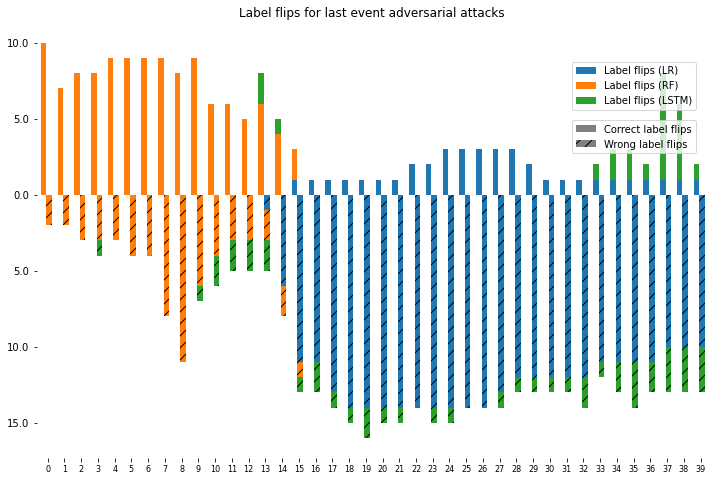

In [21]:
# create fake dataframes
x = np.arange(0, max_prefix_length)
df1 = pd.DataFrame(stacked_correct,
                   index=x,
                   columns=['Label flips (LR)','Label flips (RF)','Label flips (LSTM)'])
df2 = pd.DataFrame(stacked_wrong,
                   index=x,
                  columns=['Label flips (LR)','Label flips (RF)','Label flips (LSTM)'])
# Then, just call :
plot_clustered_stacked([df1, df2],["Correct label flips", "Wrong label flips"])